In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
df = pd.read_csv('data/hw3.csv')

In [51]:
df.head()

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2021-12-10 15:00:00,182.4900,4.8043,175.2100,175.8600,73736.747000,NaN,SOL,SOL
2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [4]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2667.000000,2163.000000,2378.000000,2.531000e+03,2.667000e+03,0.0
mean,7064.250761,7009.354391,6963.685381,2.307774e+04,4.794219e+05,NaN
std,16866.246913,16878.982545,16683.896987,2.813898e+05,1.651197e+06,NaN
min,1.000200,1.000400,1.000200,1.000500e-02,6.717800e+01,NaN
25%,5.396500,5.052950,5.226625,5.341300e+00,1.324246e+03,NaN
50%,190.387000,192.373000,187.646000,1.900500e+02,1.886909e+04,NaN
75%,284.045000,284.160000,282.607500,1.706660e+03,1.059882e+05,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,3.282850e+07,NaN


In [5]:
df.isnull().sum()

ts              0
open            0
high          504
low           289
close         136
volume          0
volumeUSD    2667
token           0
chain           0
dtype: int64

In [6]:
df.shape

(2667, 9)

<AxesSubplot:>

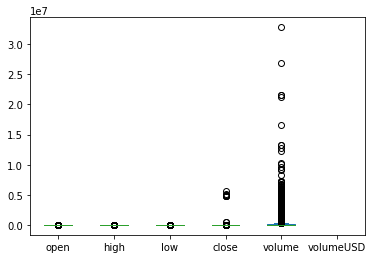

In [7]:
df.plot(kind='box')

In [8]:
df['ts'] = pd.to_datetime(df.ts)
df.set_index('ts', inplace = True)

In [9]:
df['high'].fillna(method='ffill', inplace=True)

In [10]:
df['low'].fillna(method='ffill', inplace=True)

In [11]:
df.isnull().sum()

open            0
high            0
low             0
close         136
volume          0
volumeUSD    2667
token           0
chain           0
dtype: int64

In [12]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

<AxesSubplot:>

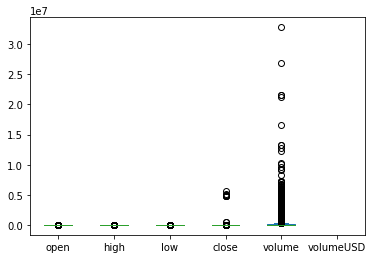

In [13]:
df.plot(kind='box')

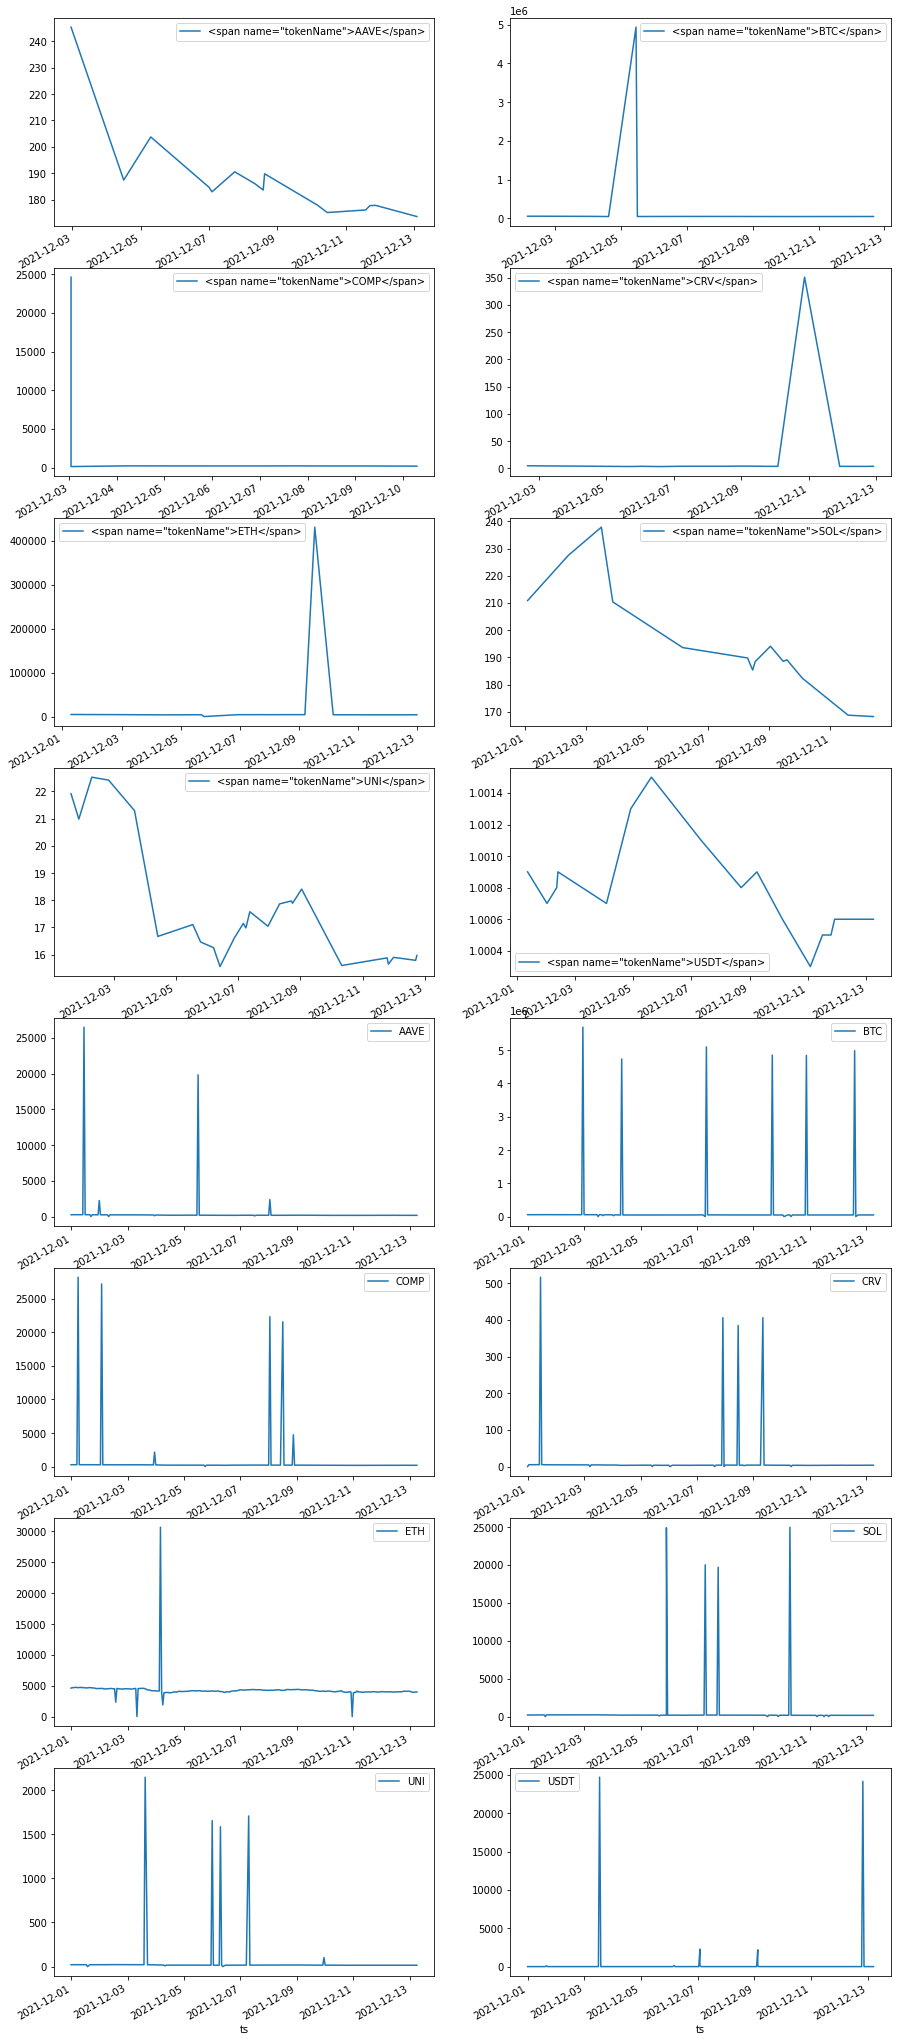

In [14]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [15]:
df.duplicated().sum()

224

In [16]:
df = df.drop_duplicates()

In [17]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [18]:
import xml

In [19]:
def remove_tags(text):
    return ''.join(xml.etree.ElementTree.fromstring(text).itertext())

In [20]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [21]:
# for token in df.token.unique():
#     remove_tags(token)

In [22]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [23]:
fill = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>')

In [24]:
df.loc[df['token'].str.contains('<span name="tokenName">'), 'token']

ts
2021-12-12 00:00:00     <span name="tokenName">UNI</span>
2021-12-10 21:00:00     <span name="tokenName">CRV</span>
2021-12-02 10:00:00     <span name="tokenName">SOL</span>
2021-12-06 02:00:00     <span name="tokenName">CRV</span>
2021-12-11 02:00:00    <span name="tokenName">USDT</span>
                                      ...                
2021-12-13 00:00:00     <span name="tokenName">ETH</span>
2021-12-07 14:00:00     <span name="tokenName">ETH</span>
2021-12-12 10:00:00     <span name="tokenName">SOL</span>
2021-12-02 16:00:00     <span name="tokenName">CRV</span>
2021-12-07 22:00:00    <span name="tokenName">COMP</span>
Name: token, Length: 139, dtype: object

In [25]:
df.loc[df['token'].str.contains('<span'), 'token']

ts
2021-12-12 00:00:00     <span name="tokenName">UNI</span>
2021-12-10 21:00:00     <span name="tokenName">CRV</span>
2021-12-02 10:00:00     <span name="tokenName">SOL</span>
2021-12-06 02:00:00     <span name="tokenName">CRV</span>
2021-12-11 02:00:00    <span name="tokenName">USDT</span>
                                      ...                
2021-12-13 00:00:00     <span name="tokenName">ETH</span>
2021-12-07 14:00:00     <span name="tokenName">ETH</span>
2021-12-12 10:00:00     <span name="tokenName">SOL</span>
2021-12-02 16:00:00     <span name="tokenName">CRV</span>
2021-12-07 22:00:00    <span name="tokenName">COMP</span>
Name: token, Length: 139, dtype: object

In [26]:
df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').squeeze()

ts
2021-12-12 00:00:00     UNI
2021-12-10 21:00:00     CRV
2021-12-02 10:00:00     SOL
2021-12-06 02:00:00     CRV
2021-12-11 02:00:00    USDT
                       ... 
2021-12-13 00:00:00     ETH
2021-12-07 14:00:00     ETH
2021-12-12 10:00:00     SOL
2021-12-02 16:00:00     CRV
2021-12-07 22:00:00    COMP
Name: 0, Length: 139, dtype: object

In [27]:
df.loc[df['token'].str.contains('<span'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').squeeze()


/Users/klimyadrintsev/anaconda3/envs/mfe-preprogram/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [28]:
# df.loc[df['token'].str.contains('<span'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">(.|\n)*?<\/span>')


In [29]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC'],
      dtype=object)

In [30]:
df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
volumeUSD    2443
token           0
chain           0
dtype: int64

In [31]:
df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
volumeUSD    2443
token           0
chain           0
dtype: int64

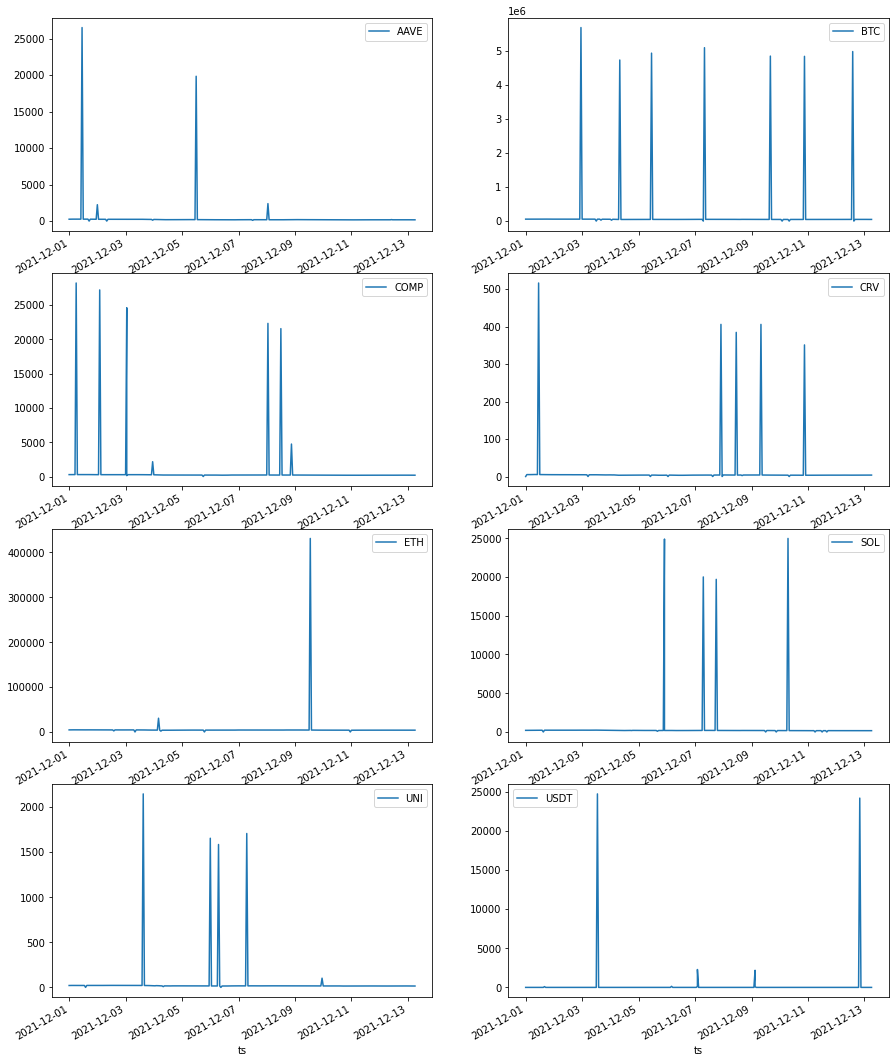

In [32]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [39]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

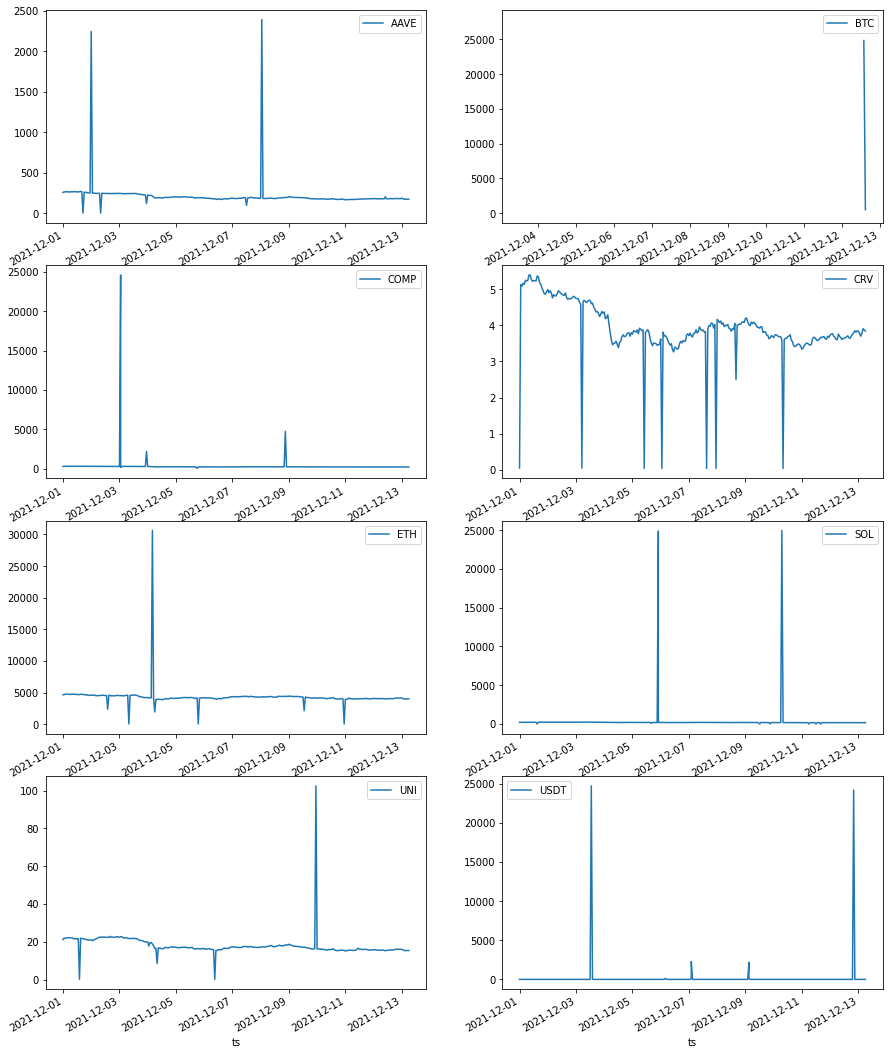

In [50]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [43]:
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

In [44]:
0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

ts
2021-12-10 07:00:00    24979.36500
2021-12-09 03:00:00       97.99540
2021-12-02 00:00:00     2244.15750
2021-12-03 01:00:00    24610.43500
2021-12-09 03:00:00     2184.26040
2021-12-07 02:00:00     2283.72060
2021-12-04 04:00:00    30639.82000
2021-12-10 02:00:00        8.28525
2021-12-06 04:00:00      136.31555
2021-12-01 16:00:00        2.35545
2021-12-07 02:00:00      128.81060
2021-12-12 23:00:00        2.63705
2021-12-12 20:00:00    24169.77025
2021-12-08 21:00:00     4737.25000
2021-12-09 23:00:00      102.50550
2021-12-05 22:00:00    24901.66650
2021-12-03 23:00:00     2162.42500
2021-12-03 13:00:00    24708.77540
2021-12-07 20:00:00        9.35490
2021-12-08 01:00:00     2391.63050
dtype: float64

In [45]:
df.loc[df.close / df.open >= 2, 'close']

ts
2021-12-10 07:00:00    24979.36500
2021-12-09 03:00:00       97.99540
2021-12-02 00:00:00     2244.15750
2021-12-03 01:00:00    24610.43500
2021-12-09 03:00:00     2184.26040
2021-12-07 02:00:00     2283.72060
2021-12-04 04:00:00    30639.82000
2021-12-10 02:00:00        8.28525
2021-12-06 04:00:00      136.31555
2021-12-01 16:00:00        2.35545
2021-12-07 02:00:00      128.81060
2021-12-12 23:00:00        2.63705
2021-12-12 20:00:00    24169.77025
2021-12-08 21:00:00     4737.25000
2021-12-09 23:00:00      102.50550
2021-12-05 22:00:00    24901.66650
2021-12-03 23:00:00     2162.42500
2021-12-03 13:00:00    24708.77540
2021-12-07 20:00:00        9.35490
2021-12-08 01:00:00     2391.63050
Name: close, dtype: float64

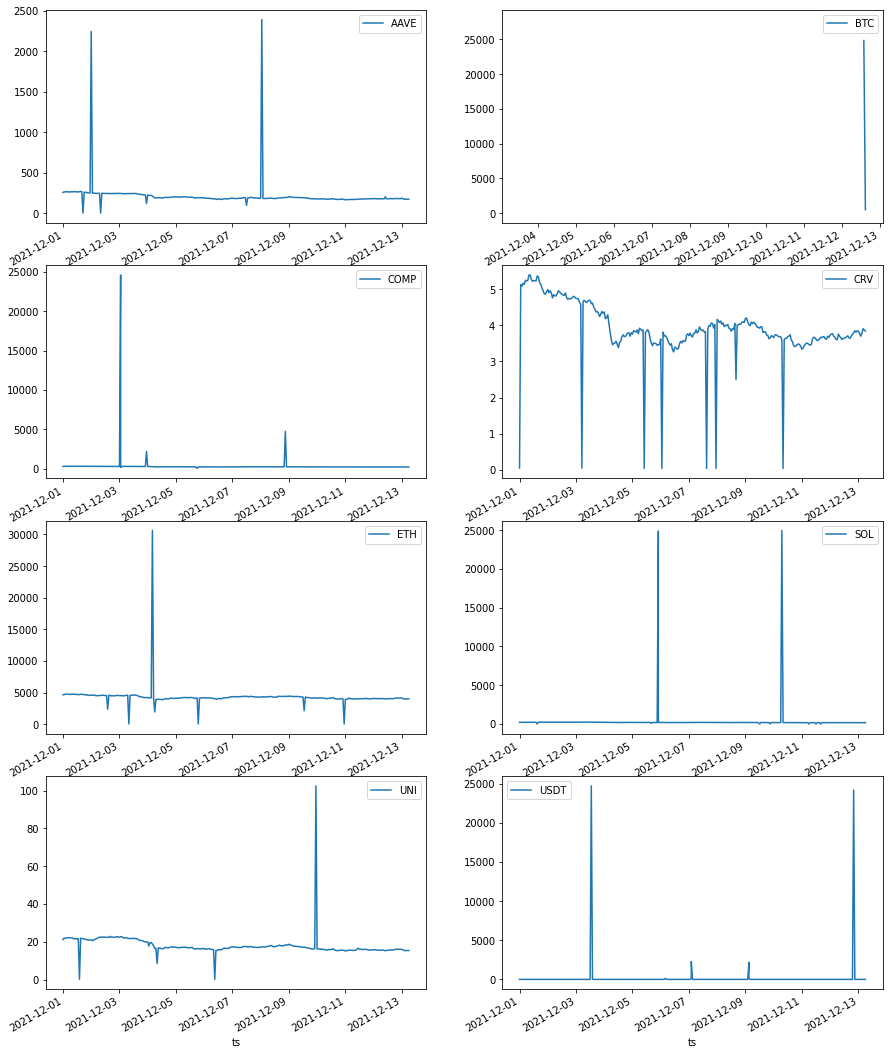

In [49]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


df.loc[df.close >= (df.close.mean() *5), 'close'] = np.nan


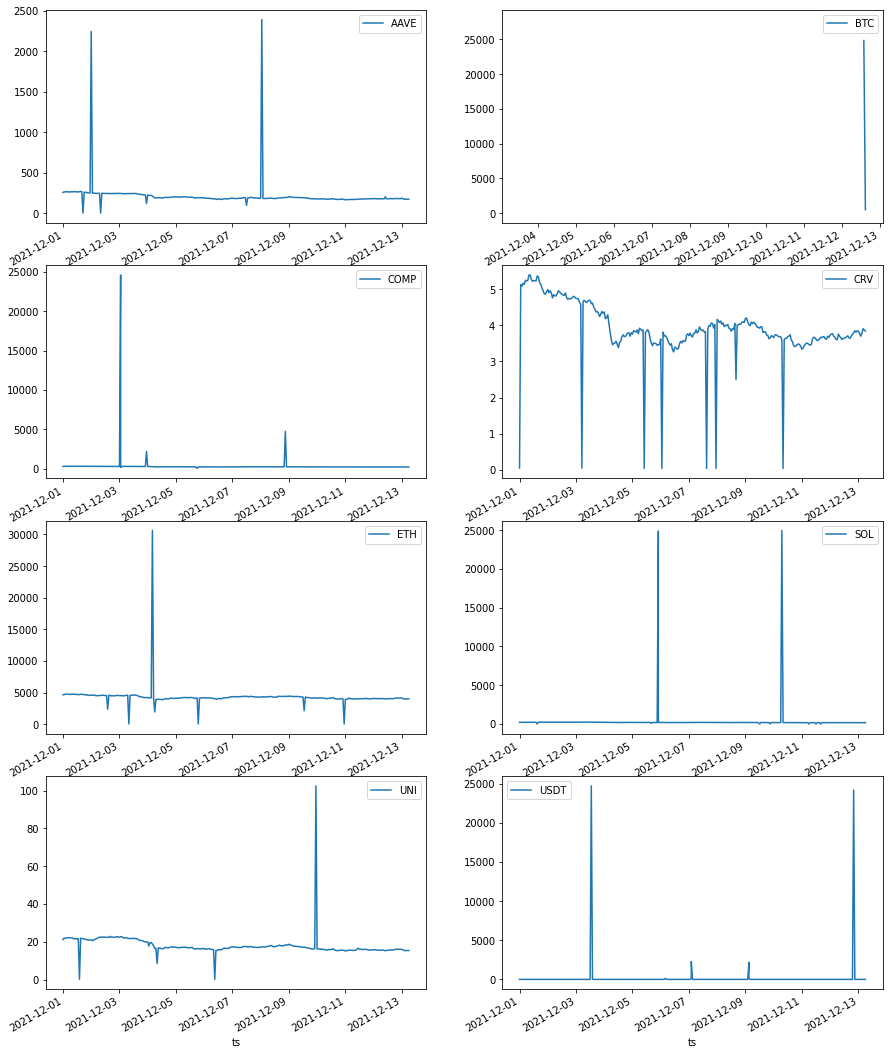

In [41]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


In [ ]:
df.close.plot(kind='box')

In [ ]:
df.mean()

In [ ]:
df.head()

In [ ]:
df.describe()

for token in df.token.unique():
    df = df[np.abs(df[df.close == token] - df[df.close ==token]).mean() <= ((3*df[df.close == token]).std())]
    

In [ ]:
df.token.unique()

df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (2*df.close.std()), 'close'].describe()

df.replace(to_replace=df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (2*df.close.std()), 'close'], value = np.nan, inplace=True )

df[df.token == 'BTC']

df[df.token == 'BTC']

(df[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close'])

(df[df.token == token].loc[df.close - df.close.mean() <= (2*df.close.std()), 'close'])

df.mask((df[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']), other=np.nan, inplace=True)

x = df[df.token == 'BTC']
x[((x.close - x.close.mean()) <= (2*x.close.std()))]

df.where((df[df.token == 'BTC'].loc[(df.close - df.close.mean()) <= (2*df.close.std())].close), np.nan, inplace=True)

df = (df[df.token == 'BTC'].loc[(df.close - df.close.mean()) <= (2*df.close.std())].close)

df[df.token == 'BTC'].close.mean()


df[df.token == 'ETH'].close.mean()

df[df.token == 'BTC'].close.std()

index_t = df[df.token == 'BTC'].loc[(df.close - df.close.mean()) <= (2*df.close.std())].index
len(index_t)

df.iloc[314, df.columns.get_loc('close')] = np.nan

for token in (df.token.unique()):
    index_t = (df[df.token == token].loc[(df.close - df.close.mean()) <= (2*df.close.std())]).index
    print(token, index_t)
    for i in range(len(index_t)):
        df.at[i, df.columns.get_loc('close')] = np.nan

df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (2*df.close.std()), 'close']

df[df.token == 'BTC'].loc[df.close - df.close.mean() >= (3*df.close.std()), 'close']

for token in df.token.unique():
    df.mask((df[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']), other=np.nan, inplace=True) 

for token in df.token.unique():
    df[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']

df = df[np.abs(df[df.close == token] - df[df.close ==token]).mean() <= ((3*df[df.close == token]).std())]

df.loc[(df.close - df.close.mean()) <= (3*df.close.std()), 'close'] = (df.loc[df.close.ffill()])


df[df.token == 'BTC']

df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']

df.replace(df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close'], np.nan)

df[df.token == 'BTC'].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']

df[df.token == 'BTC'][df.close - df.close.mean() <= (3*df.close.std()), 'close']


for token in df.token.unique():
    print(token)
    (df.loc[df.token == token].loc[df.close - df.close.mean() <= (3*df.close.std()), 'close']) = np.nan
    

df.close.isnull().sum()

In [52]:
df.loc[df.close.isnull() & df.high.notnull() & df.low.notnull(), 'close'] = 0.5 * (df.loc[df.close.isnull() & df.high.notnull() & df.low.notnull(), 'high'] + df.loc[df.close.isnull() & df.high.notnull() & df.low.notnull(), 'low'])
df.loc[df.close.isnull(), 'close'] = df.loc[df.close.isnull(), 'open'] 

In [54]:
#If high and low price is not avaiable, replace the outlier with the open price
df.loc[(df.close / df.open >= 2) | (df.close / df.open <= 0.5), 'close'] = df.loc[(df.close / df.open >= 2) | (df.close / df.open <= 0.5), 'open'] 

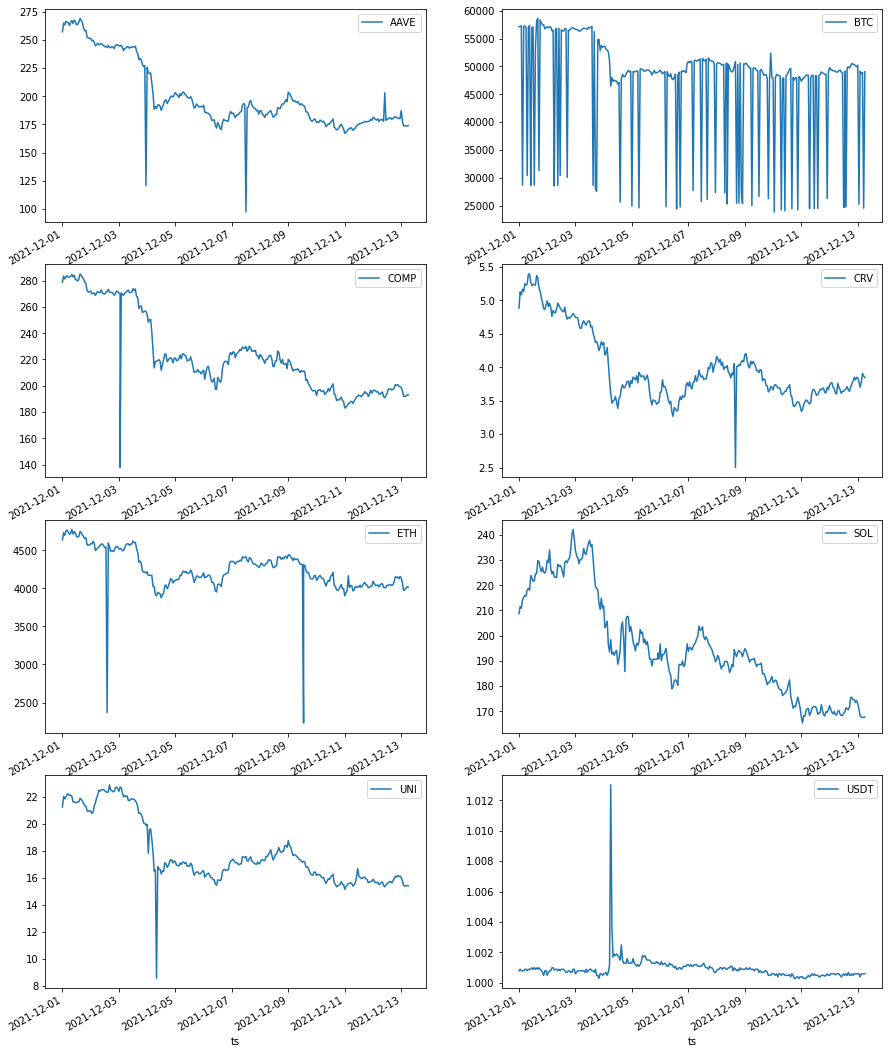

In [55]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


# I have tried everything. I am sorry.

In [56]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,4.8043,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [57]:
df.volumeUSD = df.volume * df.close

In [58]:
df.volumeUSD

0       7.041235e+05
1       3.522644e+05
2       1.296734e+07
3       7.352023e+07
4       1.341009e+07
            ...     
2661    1.350189e+05
2662    2.308318e+05
2663    8.503920e+06
2665    5.729636e+07
2666    1.796152e+06
Name: volumeUSD, Length: 2443, dtype: float64

In [ ]:
# :(